In [1]:
import pandas as pd
import numpy as np

In [2]:
ls

Random Forests.ipynb              only_motor_two_classes.csv
Random Forests_two_classes.ipynb  only_non_motor_2.csv
combined_with_two_classes.csv     only_non_motor_two_classes.csv
new_merge_2.csv                   only_self_report_2.csv
only_motor_2.csv                  only_self_report_two_classes.csv


In [60]:
raw_df = pd.read_csv('only_motor_two_classes.csv')

In [61]:
raw_df

NHY  CLASS  NP3SPCH  NP3FACXP  NP3RIGN  NP3RIGRU  NP3RIGLU  NP3RIGRL  \
0      2.0      1      2.0       2.0      1.0       3.0       2.0       2.0   
1      2.0      1      2.0       2.0      1.0       3.0       2.0       0.0   
2      2.0      1      1.0       1.0      0.0       2.0       1.0       1.0   
3      2.0      1      1.0       1.0      0.0       2.0       1.0       1.0   
4      2.0      1      1.0       1.0      0.0       2.0       2.0       1.0   
...    ...    ...      ...       ...      ...       ...       ...       ...   
10009  0.0      0      0.0       0.0      1.0       0.0       1.0       0.0   
10010  2.0      1      0.0       1.0      0.0       1.0       0.0       0.0   
10011  0.0      0      0.0       0.0      0.0       0.0       0.0       0.0   
10012  2.0      1      0.0       0.0      0.0       1.0       1.0       1.0   
10013  1.0      1      0.0       0.0      0.0       0.0       0.0       0.0   

       NP3RIGLL  NP3FTAPR  ...  NP3KTRMR  NP3KTRML  NP3RTARU  NP3RTALU  \
0           2.0       1.0  ...       3.0       2.0       1.0       2.0   
1           0.0       1.0  ...       2.0       1.0       1.0       2.0   
2           0.0       2.0  ...       1.0       1.0       1.0       3.0   
3           0.0       2.0  ...       2.0       2.0       1.0       3.0   
4           1.0       2.0  ...       1.0       0.0       0.0       0.0   
...         ...       ...  ...       ...       ...       ...       ...   
10009       0.0       0.0  ...       0.0       0.0       0.0       1.0   
10010       0.0       1.0  ...       0.0       0.0       1.0       0.0   
10011       0.0       0.0  ...       0.0       1.0       0.0       0.0   
10012       1.0       0.0  ...       0.0       0.0       0.0       1.0   
10013       0.0       0.0  ...       0.0       0.0       0.0       0.0   

       NP3RTARL  NP3RTALL  NP3RTALJ  NP3RTCON  DYSKPRES  MSEADLG  
0           0.0       0.0       0.0       2.0       0.0     95.0  
1           0.0       0.0       1.0       2.0       0.0     95.0  
2           0.0       0.0       0.0       3.0       0.0     90.0  
3           0.0       0.0       0.0       3.0       0.0     90.0  
4           0.0       0.0       0.0       0.0       0.0     90.0  
...         ...       ...       ...       ...       ...      ...  
10009       0.0       0.0       0.0       1.0       0.0    100.0  
10010       0.0       0.0       0.0       2.0       0.0     95.0  
10011       0.0       0.0       0.0       0.0       0.0    100.0  
10012       0.0       0.0       0.0       2.0       0.0     90.0  
10013       0.0       0.0       0.0       0.0       0.0    100.0  

[10014 rows x 37 columns]

In [62]:
# raw_df = raw_df.iloc[:, 1:]

In [63]:
from sklearn.model_selection import StratifiedKFold

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
model = RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [67]:
cv = StratifiedKFold(n_splits=5)

In [68]:
X, Y = raw_df.iloc[:, 2:], raw_df.iloc[:, 1]

In [69]:
X.shape

(10014, 35)

In [70]:
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_classification_reports = []
fold_importances = []

In [71]:
for fold, (train_index, test_index) in enumerate(cv.split(X, Y)):
    print(f"fold: {fold + 1}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='macro', zero_division=0)
    recall = recall_score(Y_test, Y_pred, average='macro', zero_division=0)
    report = classification_report(Y_test, Y_pred, zero_division=0)

    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_classification_reports.append(report)

    fold_importance = model.feature_importances_
    fold_importances.append(fold_importance)

    print(f"Accuracy for fold {fold + 1}: {accuracy:.4f}")
    print(f"Recall for fold {fold + 1}: {recall:.4f}")
    print(f"Precision for fold {fold + 1}: {precision:.4f}")
    print("-----")

fold: 1
Accuracy for fold 1: 0.9501
Recall for fold 1: 0.9275
Precision for fold 1: 0.9470
-----
fold: 2
Accuracy for fold 2: 0.9690
Recall for fold 2: 0.9582
Precision for fold 2: 0.9644
-----
fold: 3
Accuracy for fold 3: 0.9651
Recall for fold 3: 0.9429
Precision for fold 3: 0.9701
-----
fold: 4
Accuracy for fold 4: 0.9386
Recall for fold 4: 0.9377
Precision for fold 4: 0.9158
-----
fold: 5
Accuracy for fold 5: 0.9191
Recall for fold 5: 0.9121
Precision for fold 5: 0.8933
-----


In [72]:
fold_accuracies = np.array(fold_accuracies)
fold_precisions = np.array(fold_precisions)
fold_recalls = np.array(fold_recalls)
fold_importances = np.array(fold_importances)

In [73]:
print("Non-weighted:")
print(f"{fold_accuracies.mean():.4f}")
print(f"{fold_precisions.mean():.4f}")
print(f"{fold_recalls.mean():.4f}")

Non-weighted:
0.9484
0.9381
0.9357


In [75]:
importances = fold_importances.mean(axis=0)

In [77]:
importances.shape

(35,)

In [78]:
importances_df = pd.DataFrame({
    'features': X.columns.tolist(),
    'importances': importances    
})

In [79]:
importances_df

features  importances
0    NP3SPCH     0.014852
1   NP3FACXP     0.100931
2    NP3RIGN     0.017608
3   NP3RIGRU     0.053066
4   NP3RIGLU     0.050501
5   NP3RIGRL     0.015147
6   NP3RIGLL     0.011852
7   NP3FTAPR     0.045416
8   NP3FTAPL     0.029949
9   NP3HMOVR     0.023277
10  NP3HMOVL     0.023186
11  NP3PRSPR     0.036114
12  NP3PRSPL     0.040520
13  NP3TTAPR     0.036308
14  NP3TTAPL     0.026147
15  NP3LGAGR     0.008876
16  NP3LGAGL     0.010186
17  NP3RISNG     0.004960
18   NP3GAIT     0.035128
19  NP3FRZGT     0.000532
20  NP3PSTBL     0.004661
21  NP3POSTR     0.011874
22  NP3BRADY     0.142620
23  NP3PTRMR     0.006758
24  NP3PTRML     0.007042
25  NP3KTRMR     0.006521
26  NP3KTRML     0.008374
27  NP3RTARU     0.017671
28  NP3RTALU     0.013435
29  NP3RTARL     0.002395
30  NP3RTALL     0.002402
31  NP3RTALJ     0.000897
32  NP3RTCON     0.052927
33  DYSKPRES     0.011626
34   MSEADLG     0.126241

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='importances', ylabel='features'>

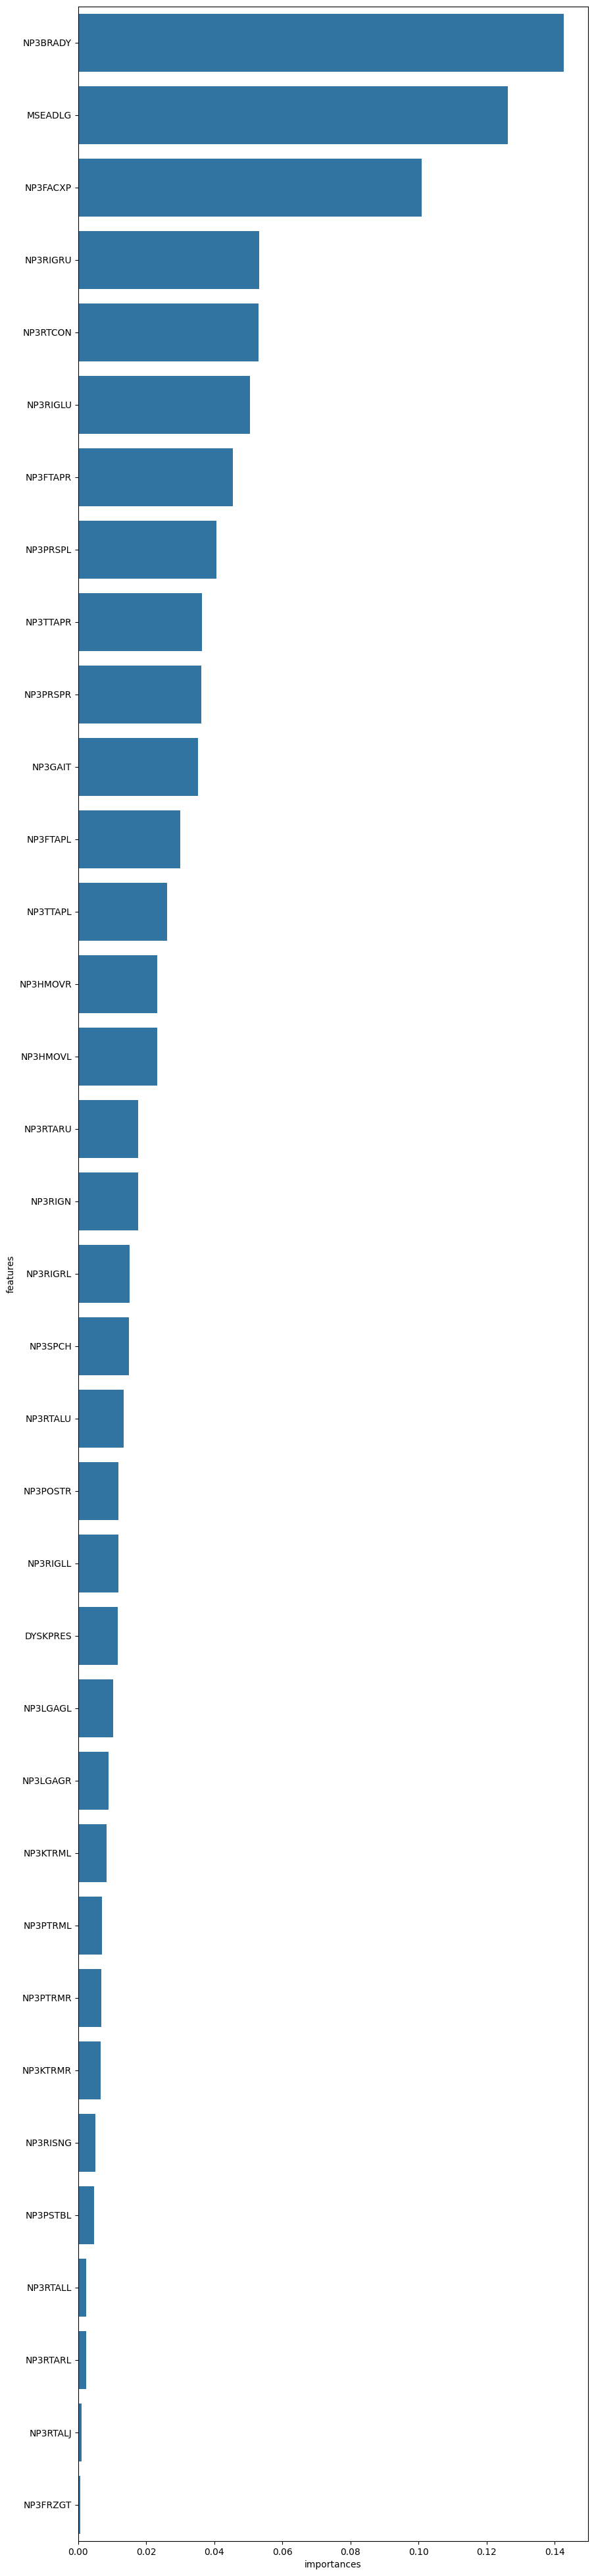

In [85]:
plt.figure(figsize = (10, 50))
sns.barplot(importances_df.sort_values('importances', ascending=False), x='importances', y='features')

In [87]:
top_20 = importances_df.sort_values('importances', ascending=False).head(20)

In [88]:
top_20

features  importances
22  NP3BRADY     0.142620
34   MSEADLG     0.126241
1   NP3FACXP     0.100931
3   NP3RIGRU     0.053066
32  NP3RTCON     0.052927
4   NP3RIGLU     0.050501
7   NP3FTAPR     0.045416
12  NP3PRSPL     0.040520
13  NP3TTAPR     0.036308
11  NP3PRSPR     0.036114
18   NP3GAIT     0.035128
8   NP3FTAPL     0.029949
14  NP3TTAPL     0.026147
9   NP3HMOVR     0.023277
10  NP3HMOVL     0.023186
27  NP3RTARU     0.017671
2    NP3RIGN     0.017608
5   NP3RIGRL     0.015147
0    NP3SPCH     0.014852
28  NP3RTALU     0.013435

In [31]:
# Weighted

In [41]:
model_2 = RandomForestClassifier(n_jobs=-1, n_estimators=200, random_state=0, class_weight='balanced')

In [42]:
fold_accuracies_2 = []
fold_recalls_2 = []
fold_precisions_2 = []
fold_classification_reports_2 = []

In [43]:
for fold, (train_index, test_index) in enumerate(cv.split(X, Y)):
    print(f"fold: {fold + 1}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    model_2.fit(X_train, Y_train)

    Y_pred = model_2.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='macro')
    recall = recall_score(Y_test, Y_pred, average='macro')
    report = classification_report(Y_test, Y_pred)

    fold_accuracies_2.append(accuracy)
    fold_precisions_2.append(precision)
    fold_recalls_2.append(recall)
    fold_classification_reports_2.append(report)

    print(f"Accuracy for fold {fold + 1}: {accuracy:.4f}")
    print(f"Recall for fold {fold + 1}: {recall:.4f}")
    print(f"Precision for fold {fold + 1}: {precision:.4f}")
    print("-----")

fold: 1
Accuracy for fold 1: 0.9011
Recall for fold 1: 0.7111
Precision for fold 1: 0.8644
-----
fold: 2
Accuracy for fold 2: 0.9201
Recall for fold 2: 0.6882
Precision for fold 2: 0.9146
-----
fold: 3
Accuracy for fold 3: 0.9186
Recall for fold 3: 0.7085
Precision for fold 3: 0.9125
-----
fold: 4
Accuracy for fold 4: 0.8917
Recall for fold 4: 0.7024
Precision for fold 4: 0.8523
-----
fold: 5
Accuracy for fold 5: 0.8716
Recall for fold 5: 0.6604
Precision for fold 5: 0.9085
-----


In [44]:
fold_accuracies_2 = np.array(fold_accuracies_2)
fold_precisions_2 = np.array(fold_precisions_2)
fold_recalls_2 = np.array(fold_recalls_2)

In [45]:
print("Weighted:")
print(fold_accuracies_2.mean())
print(fold_precisions_2.mean())
print(fold_recalls_2.mean())

Weighted:
0.9006362085243763
0.8904599889626693
0.694130932125464


In [7]:
train_df, test_df = train_test_split(raw_df, test_size=0.3, random_state = 0)

In [8]:
X_train = train_df.iloc[:, 2:]

In [9]:
Y_train = train_df.iloc[:, 1]

In [10]:
X_test = test_df.iloc[:, 2:]

In [11]:
Y_test = test_df.iloc[:, 1]

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
model = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=0)

In [14]:
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=0)

In [15]:
Y_train_pred = model.predict(X_train)

In [16]:
Y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

In [18]:
accuracy_score(Y_train, Y_train_pred)

1.0

In [19]:
accuracy_score(Y_test, Y_pred)

0.9381031613976706

In [38]:
precision_score(Y_test, Y_pred, average='macro')

0.9480942013270864

In [39]:
recall_score(Y_test, Y_pred, average='macro')

0.8108895159666522

In [20]:
report = classification_report(Y_test, Y_pred)

In [21]:
print(report)

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       839
         1.0       0.94      0.97      0.95      1981
         2.0       0.97      0.51      0.67       185

    accuracy                           0.94      3005
   macro avg       0.95      0.81      0.86      3005
weighted avg       0.94      0.94      0.93      3005



In [22]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
})

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='importance', ylabel='feature'>

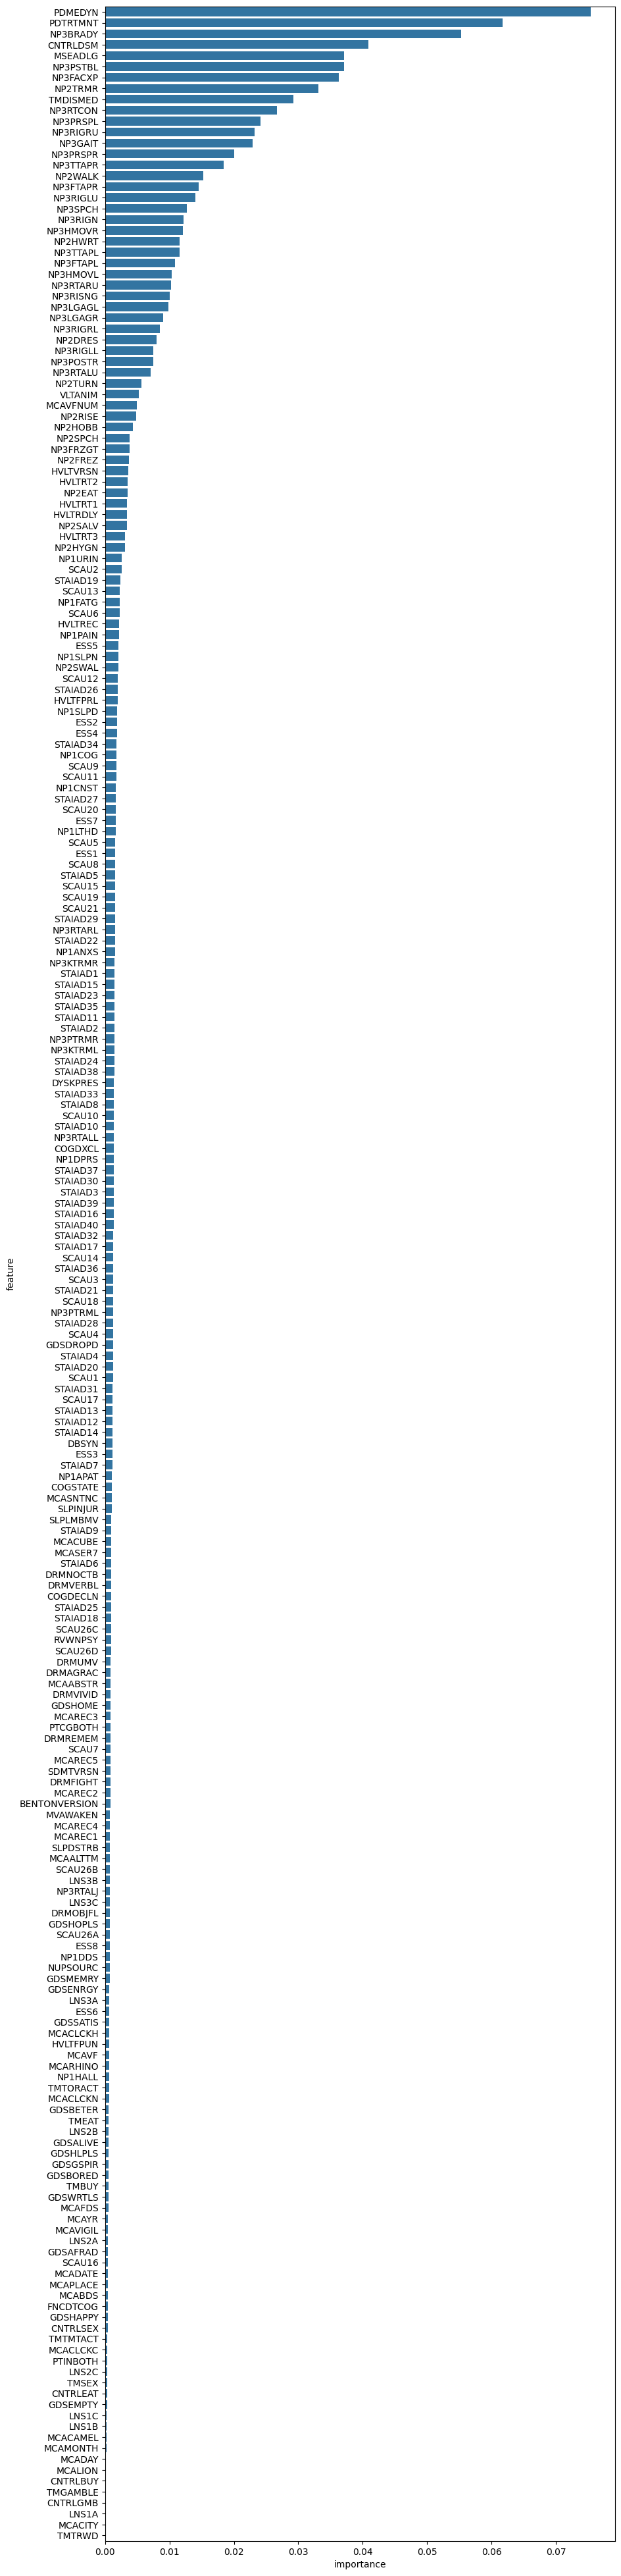

In [24]:
plt.figure(figsize=(10,50))
sns.barplot(data=importance_df.sort_values('importance', ascending=False), x='importance', y='feature')

In [32]:
top_25 = importance_df.sort_values('importance', ascending=False)['feature'].head(25).tolist()

In [33]:
top_25

['PDMEDYN',
 'PDTRTMNT',
 'NP3BRADY',
 'CNTRLDSM',
 'MSEADLG',
 'NP3PSTBL',
 'NP3FACXP',
 'NP2TRMR',
 'TMDISMED',
 'NP3RTCON',
 'NP3PRSPL',
 'NP3RIGRU',
 'NP3GAIT',
 'NP3PRSPR',
 'NP3TTAPR',
 'NP2WALK',
 'NP3FTAPR',
 'NP3RIGLU',
 'NP3SPCH',
 'NP3RIGN',
 'NP3HMOVR',
 'NP2HWRT',
 'NP3TTAPL',
 'NP3FTAPL',
 'NP3HMOVL']